In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [3]:
### we read the dataset
dataset = fp.read_dataset(input_dir = "../../../Tutorials/spectral_dataset",
                          file_name = "raw_dataset_gated")

In [4]:
dataset

AnnData object with n_obs × n_vars = 200000 × 36
    obs: 'sample_ID', 'file_name', 'group_fd', 'internal_id', 'organ', 'staining', 'diag_main', 'diag_fine', 'donor_id', 'material', 'batch', 'CD45+_transformed_leiden', 'NK_cells_clustered', 'T_cells', 'CD4_T_cells', 'CD8_T_cells'
    var: 'pns', 'png', 'pne', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'settings', 'pca_CD45+_transformed', 'CD45+_transformed_neighbors', 'CD45+_transformed_leiden', 'umap_CD45+_transformed', 'CD45+_transformed_leiden_colors', 'NK_cells_clustered_colors', 'T_cells_colors', 'CD4_T_cells_colors', 'CD8_T_cells_colors'
    obsm: 'X_pca_CD45+_transformed', 'X_umap_CD45+_transformed', 'gating'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'
    obsp: 'CD45+_transformed_neighbors_connectivities', 'CD45+_transformed_neighbors_distances'

In [5]:
### here, we choose to analyze the group of CD4 positive T-cells

In [6]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD4_T_cells"

In [7]:
### first, we calculate the MFI and FOP for all markers for the compensated layer
fp.tl.mfi(dataset,
          layer = "compensated")
fp.tl.fop(dataset,
          layer = "compensated")

In [8]:
### first, we calculate the MFI and FOP for all markers for the transformed layer
### note that layer = "transformed" is set implicitly through the settings
fp.tl.mfi(dataset)
fp.tl.fop(dataset)

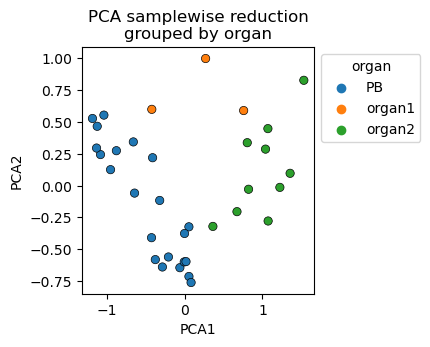

In [9]:
### we calculate the samplewise PCA by the mfi values
### implicitly, we use the transformed values
fp.tl.pca_samplewise(dataset,
                     use_only_fluo = True,
                     exclude = None)
### next, we use the according plotting function to display
fp.pl.pca_samplewise(dataset,
                     groupby = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'MDS: The settings where changed, because this avoids a future warning. The settings was normalized_stress and the new value is auto'
  warnings.warn(DimredSettingModificationWarning._construct_message(**warning_kwargs),
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'MDS: The settings where changed, because this avoids a future warning. The settings was normalized_stress and the new value is auto'
  warnings.warn(DimredSettingModificationWarning._construct_message(**warning_kwargs),
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'MDS: The settings where changed, because this avoids a future warning. The settings was normalized_stress and the new value is auto'
  warnings.warn(DimredSettingModificationWarning._const

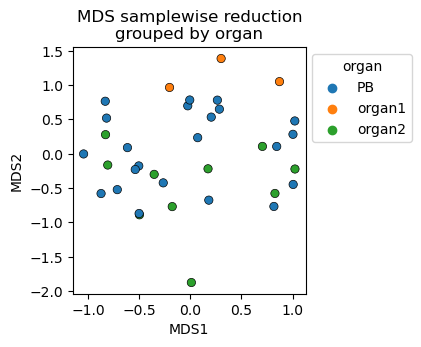

In [10]:
### to show the functionality we repeat this for MDS...
fp.tl.mds_samplewise(dataset,
                     use_only_fluo = True,
                     exclude = None)
fp.pl.mds_samplewise(dataset,
                     groupby = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting

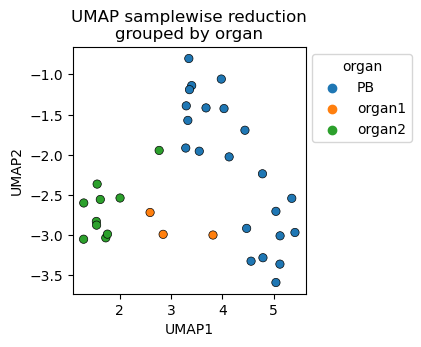

In [11]:
### ... samplewise UMAP
fp.tl.umap_samplewise(dataset,
                      use_only_fluo = True,
                      exclude = None)
fp.pl.umap_samplewise(dataset,
                      groupby = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'TSNE: The settings where changed, because this avoids a value error. The settings was perplexity and the new value is 30'
  warnings.warn(DimredSettingModificationWarning._construct_message(**warning_kwargs),
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'TSNE: The settings where changed, because this avoids a value error. The settings was perplexity and the new value is 30'
  warnings.warn(DimredSettingModificationWarning._construct_message(**warning_kwargs),
C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_utils.py:409: DimredSettingModificationWarning: 'TSNE: The settings where changed, because this avoids a value error. The settings was perplexity and the new value is 30'
  warnings.warn(DimredSettingModificationWarning._construct_message(**warning_kwargs),
C

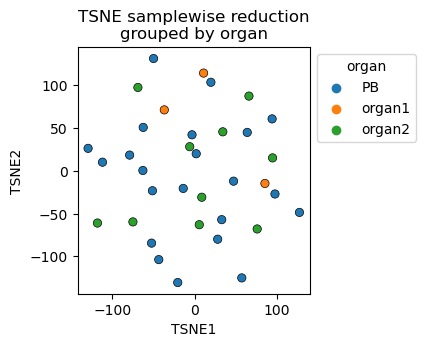

In [12]:
### and samplewise TSNE
fp.tl.tsne_samplewise(dataset,
                      use_only_fluo = True,
                      exclude = None)
fp.pl.tsne_samplewise(dataset,
                      groupby = "organ")

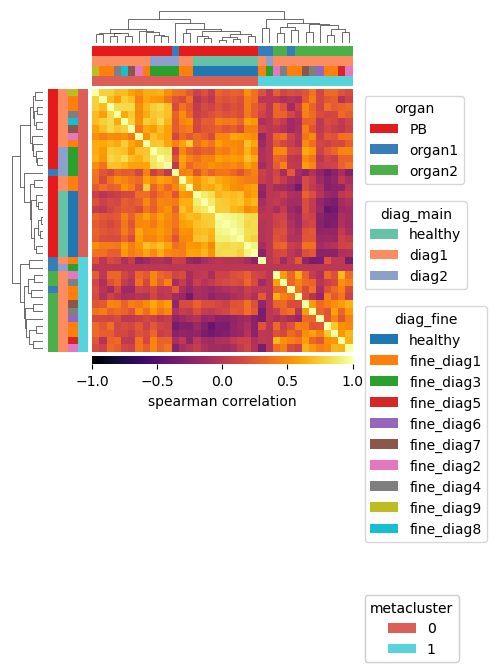

In [13]:
### the sample correlation plot offers a pearson (corr_method = "pearson")
### spearman (corr_method = "spearman") or kendall (corr_method = "kendall")
### matrix which is annotated by the metadata of choice.
### the metacluster option allows to apply hierarchical metaclustering of 
### the shown clustering, which is stored in the metadata for further analysis

fp.pl.sample_correlation(dataset,
                         annotate = ["organ", "diag_main", "diag_fine"],
                         metaclusters = 2,
                         corr_method = "spearman",
                         label_metaclusters_in_dataset = True,
                         label_metaclusters_key = "sample_corr_metaclusters")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\FACSPy\tools\_fold_change.py:67: NaNRemovalWarning: 'NaN detected while calculating fold changes. The NaN will be removed!'
  warnings.warn("NaN detected while calculating fold changes. The NaN will be removed!",


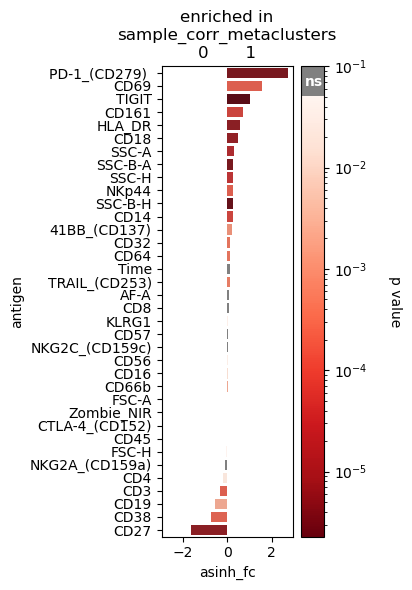

In [14]:
### to visualize the differences in marker expression, we can plot the asinh fold changes
### we use the fold_change function and specify the groupby parameter as well as the
### two groups we want to compare. 
### The colorbar shows the p-value (or adj. p with stat = "p_adj"), where above 0.05
### is considered not significant

fp.pl.fold_change(dataset,
                  layer = "compensated",
                  groupby  = "sample_corr_metaclusters",
                  group1 = "0",
                  group2 = "1",
                  stat = "p",
                  figsize = (4,6))

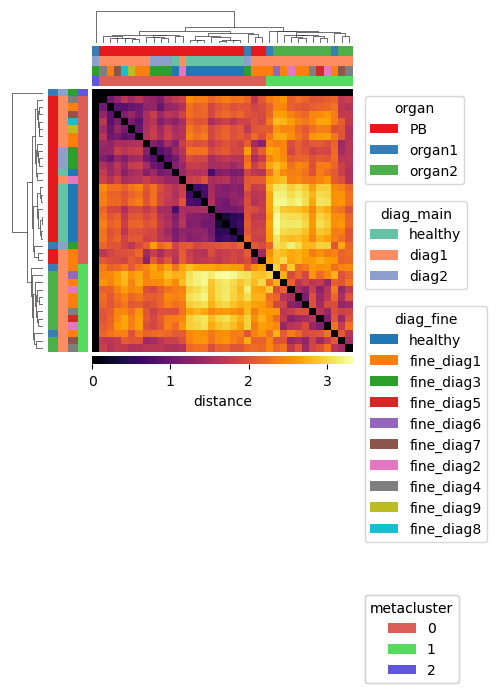

In [15]:
fp.pl.sample_distance(dataset,
                      annotate = ["organ", "diag_main", "diag_fine"],
                      metaclusters = 3,
                      label_metaclusters_in_dataset = True,
                      label_metaclusters_key = "sample_dist_metaclusters")

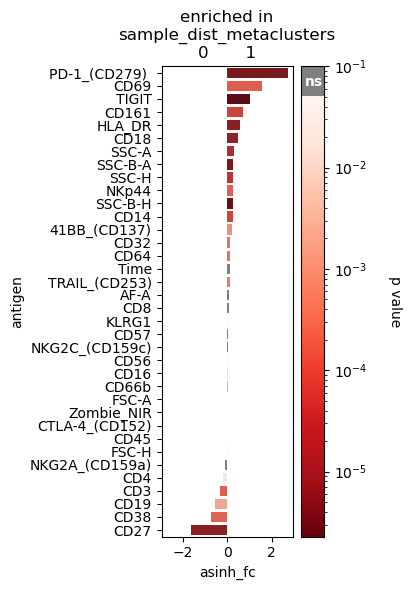

In [16]:
fp.pl.fold_change(dataset,
                  layer = "compensated",
                  groupby  = "sample_dist_metaclusters",
                  group1 = "0",
                  group2 = "1",
                  figsize = (4,6))

In [17]:
fp.subset_fluo_channels(dataset)
fp.sync.synchronize_dataset(dataset)

['var_names']
synchronizing vars
     ... synchronized frame mfi_sample_ID_compensated
     ... synchronized frame mfi_sample_ID_transformed
     ... synchronized frame fop_sample_ID_compensated
     ... synchronized frame fop_sample_ID_transformed
     ... updated panel
     ... updated cofactors


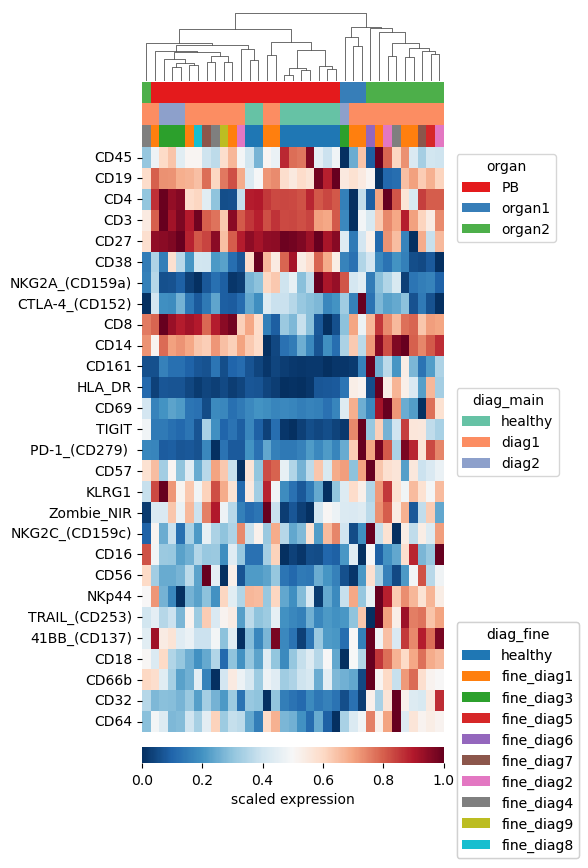

In [18]:
fp.pl.expression_heatmap(dataset,
                         annotate = ["organ", "diag_main", "diag_fine"],
                         figsize = (5,8))

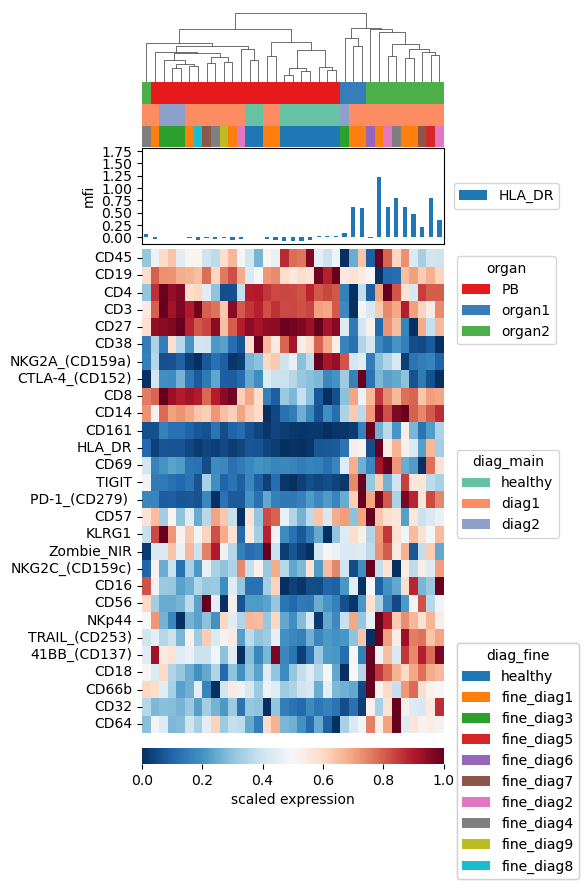

In [19]:
fp.pl.expression_heatmap(dataset,
                         annotate = ["organ", "diag_main", "diag_fine"],
                         plot_annotate = "HLA_DR",
                         figsize = (5,8))

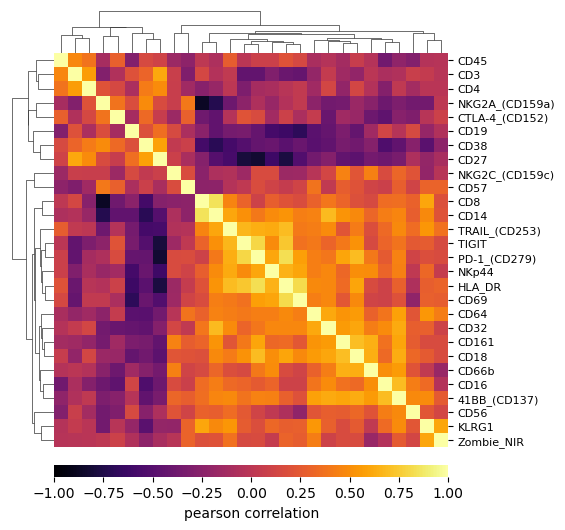

In [20]:
fp.pl.marker_correlation(dataset,
                         figsize = (6,6),
                         y_label_fontsize = 8)

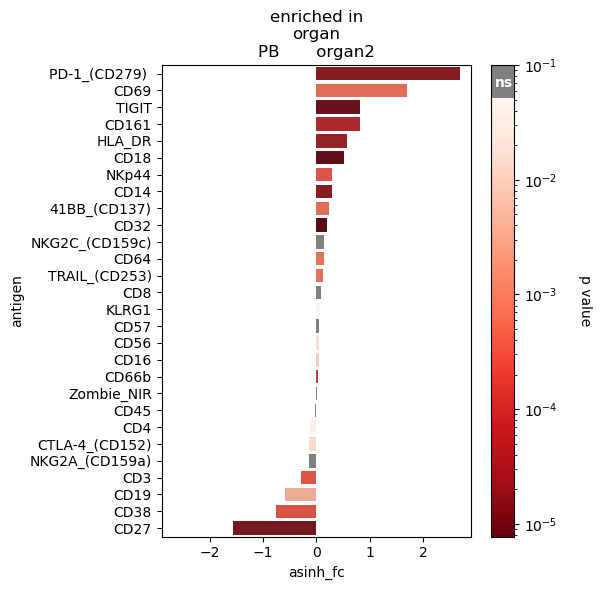

In [21]:
fp.pl.fold_change(dataset,
                  layer = "compensated",
                  groupby  = "organ",
                  group1 = "PB",
                  group2 = "organ2",
                  figsize = (6,6))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


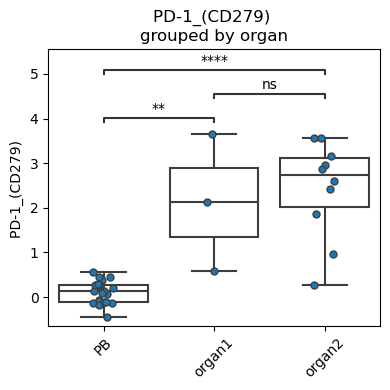

In [22]:
fp.pl.mfi(dataset,
          groupby = "organ",
          marker = "PD-1_(CD279) ",
          figsize = (4,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


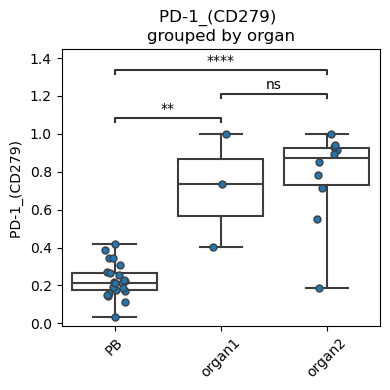

In [23]:
fp.pl.fop(dataset,
          layer = "compensated",
          groupby = "organ",
          marker = "PD-1_(CD279) ",
          figsize = (4,4))

In [24]:
fp.save_dataset(dataset,
                output_dir = "../../../Tutorials/spectral_dataset",
                file_name = "raw_dataset_samplewise",
                overwrite = True)

File saved successfully
